In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import refspec

In [2]:
root = os.environ['LUSEE_DRIVE_DIR']+'//Simulations/ElectronicsModel/measurement/sky-model'
data = [np.loadtxt(root+f'/pre2mb3_jfet4e-6-16M_g0_ch{i}_fpga.dat', skiprows=401) for i in range(4)]

In [3]:
def avg(data):
    return np.mean(data.reshape((-1,32)), axis=1)

Text(0, 0.5, 'ratio to mean')

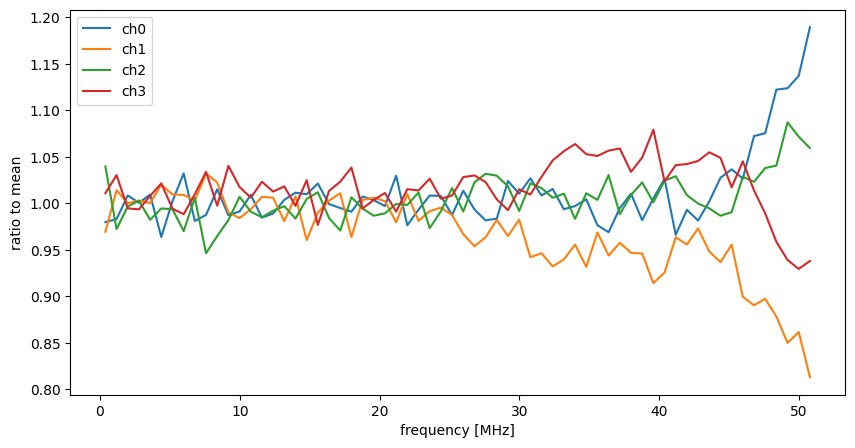

In [4]:
plt.figure(figsize=(10,5))
mean = np.mean(data, axis=0)[:,1]
fd = data[0][:,0]
for i,d in enumerate(data):
    plt.plot(avg(fd), avg(d[:,1])/avg(mean),label=f'ch{i}')

plt.legend()
plt.xlabel('frequency [MHz]')
plt.ylabel('ratio to mean')


In [5]:
filename="adc_waveform.bin"
cfg = refspec.SpecConfig()
cfg.Ntaps           = 8
cfg.Nchannels       = 1
cfg.Average1Size    = 64
cfg.Average2Size    = 700
fundamental         = cfg.fundamental_frequency()
blocks              = cfg.AverageSize()+2*cfg.Ntaps
signal = refspec.FileStreamSource(cfg.Nfft,cfg.Nchannels,filename)
output = refspec.SpecOutput(cfg)
spectrometer = refspec.RefSpectrometer(signal, cfg)
spectrometer.run(output)
f = fundamental*np.arange(cfg.Nbins())/1e6
Pk = np.array([output.get_avg_pspec(0, i) for i in range(0, cfg.Nbins())])



Read 204800000 records from adc_waveform.bin


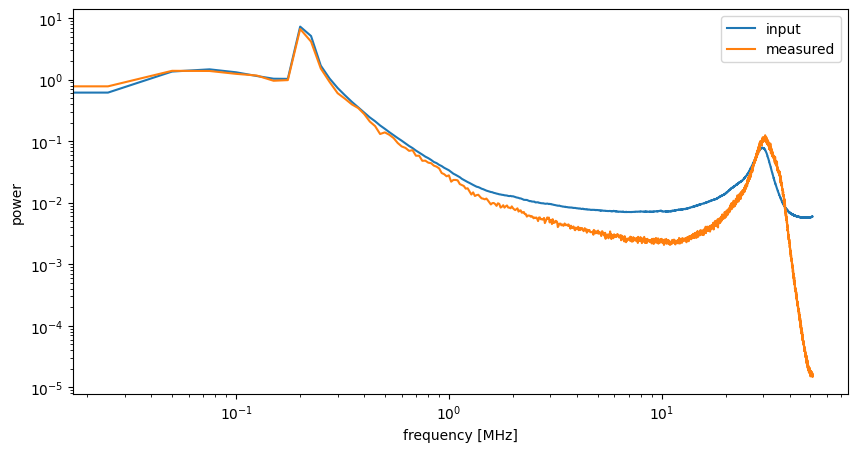

In [6]:
plt.figure(figsize=(10,5))
plt.plot(fd,Pk[:-1],label='input')
plt.plot(fd,mean*3.5e-7,label='measured')
plt.xlabel('frequency [MHz]')
plt.ylabel('power')
plt.loglog()
plt.legend()

/tmp/ipykernel_1140/3868278693.py:9: RuntimeWarning: divide by zero encountered in log10
  db = np.log10(r1)*10
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


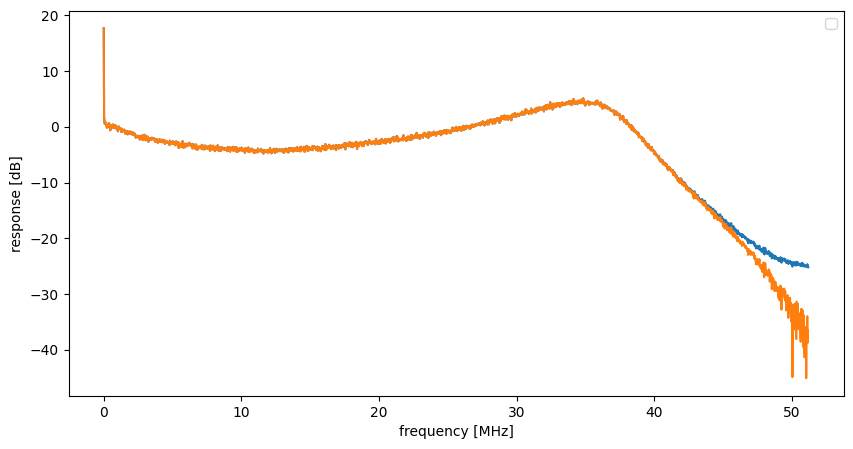

In [7]:
plt.figure(figsize=(10,5))
r = (mean)/(Pk[:-1])
r /= r[1024]

r1 = (mean-mean[-1])/(Pk[:-1])
r1 /= r1[1024]
db = np.log10(r)*10
plt.plot(fd,db)
db = np.log10(r1)*10
plt.plot(fd,db)

plt.xlabel('frequency [MHz]')
plt.ylabel('response [dB]')
plt.legend()